# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
df_north = pd.read_csv("NorthCallCenter.csv")
df_south = pd.read_csv("SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [12]:
# EDA Question 1A solution below:
rep_total_n = df_north['Rep ID'].nunique()
print(f"The North branch has {rep_total_n} representatives.")

The North branch has 9 representatives.


#### EDA Question 1B:  How many reps are in the South branch?  

In [13]:
# EDA Question 1B solution Below:
rep_total_s = df_south['Rep ID'].nunique()
print(f"The South branch has {rep_total_s} representatives.")

The South branch has 11 representatives.


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [15]:
# EDA Question 2A solution Below:
avg_busy_n = round(df_north["Busy Minutes"].mean(), 3)
avg_not_ready_n = round(df_north["Not Ready Minutes"].mean(), 3)
avg_incoming_wait_n = round(df_north["Incoming Wait Time"].mean(), 3)
avg_during_call_wait_n = round(df_north["During Call Wait Time"].mean(), 3)

print("Average Time Per Category (North Branch)")
print("Average Busy Minutes:", avg_busy_n)
print("Average Not Ready Minutes:", avg_not_ready_n)
print("Average Incoming Wait Time:", avg_incoming_wait_n)
print("Average During Call Wait Time:", avg_during_call_wait_n)

Average Time Per Category (North Branch)
Average Busy Minutes: 9.988
Average Not Ready Minutes: 1.914
Average Incoming Wait Time: 3.049
Average During Call Wait Time: 2.967


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [16]:
# EDA Question 2B solution Below:
# EDA Question 2A solution Below:
avg_busy_s = round(df_south["Busy Minutes"].mean(), 3)
avg_not_ready_s = round(df_south["Not Ready Minutes"].mean(), 3)
avg_incoming_wait_s = round(df_south["Incoming Wait Time"].mean(), 3)
avg_during_call_wait_s = round(df_south["During Call Wait Time"].mean(), 3)

print("Average Time Per Category (South Branch)")
print("Average Busy Minutes:", avg_busy_s)
print("Average Not Ready Minutes:", avg_not_ready_s)
print("Average Incoming Wait Time:", avg_incoming_wait_s)
print("Average During Call Wait Time:", avg_during_call_wait_s)

Average Time Per Category (South Branch)
Average Busy Minutes: 10.054
Average Not Ready Minutes: 1.911
Average Incoming Wait Time: 3.0
Average During Call Wait Time: 3.076


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [27]:
# EDA Question 3 solution Below:
df_combined = pd.concat([df_north, df_south], ignore_index=True)
calls_by_time_block = (
    df_combined.groupby("Time Block")
    .size()
    .reset_index(name="num_calls")
    .sort_values("num_calls", ascending=False)
)
print(calls_by_time_block)

  Time Block  num_calls
2   12:00 PM        120
0   10:00 AM         99
5    3:00 PM         73
4    2:00 PM         65
1   11:00 AM         56
6    4:00 PM         53
7    5:00 PM         43
3    1:00 PM         40
8    9:00 AM         10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 9.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [32]:
# Question 1 solution below
df_north.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [115]:
df_south[df_south['Incoming Wait Time'].isnull()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,NaN,4
127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,NaN,4
128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,NaN,4
129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,NaN,4
130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2


In [33]:
df_south.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [116]:
df_south[df_south['Incoming Wait Time'].isnull()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,NaN,4
127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,NaN,4
128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,NaN,4
129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,NaN,4
130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2


#### Record your answer below:

> Your Answer: It appears that the only column where data may be "missing" is for 'Incoming Wait Time'. Given only this column has nulls, it seems probable that this is by design of how 'Incoming Wait Time' is captured. That is, is possible that these calls were answered immediately and therefore there was not any wait time (and it was not captured as 0 minutes). It is also possible that some of these calls never reached the waiting queue to be picked up by a representative, since it is possible that any number of these calls were lost or abandoned, as well. The most likely answer, however, is that they were all outgoing phone calls rather tha incoming, so the column would not be applicable.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [51]:
# Cleaning Question 2 solution below:
df_north['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [52]:
df_north['Sale'] = df_north['Sale'].str.strip()

In [53]:
df_north['Sale'].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: Within the 'Sale' column, there are separate 'YES' values differentiated by a space at the end of one of them, which was found using 'unique()'. To correct this, I stripped the whitespace to ensure consistency.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [50]:
# Cleaning Question 3 solution below:
df_combined[df_combined.duplicated(keep=False)]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


##### Record your answer below:
> Your Answer: There do not appear to be any duplicates in the datasets.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [ ]:
# Cleaning Question 4 solution below:
df_south['Calls'].unique()

array([1])

In [80]:
df_north['Calls'].unique()

array([1])

In [81]:
df_south['Unnamed: 0'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
df_north['Unnamed: 0'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [95]:
df_south.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3


In [ ]:
df_north.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


##### Record your answer below:
> Your Answer: The column 'Unnamed: 0' appears that it may have been an index column in the .csv file that was read into the dataframe as its own column. Since it appears to be a duplicate or leftover index, it should be able to be dropped from the dataframe without ill effect.

Additionally, the 'Calls' column does not appear to provide any valuable information and the only value held in it across both dataframes is '1'. Given this information is not useful to the analysis, it should be able to be dropped from the dataframe without ill effect.

In [ ]:
df_south = df_south.drop(columns=['Unnamed: 0', 'Calls'])
df_north = df_north.drop(columns=['Unnamed: 0', 'Calls'])

In [ ]:
df_south.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4


In [94]:
df_north.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4


## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [ ]:
# Create dataframe for the entire company named df

df = pd.concat([df_north, df_south], ignore_index=True)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [ ]:
# Manipulation Question solution below:
calls_per_rep = (
    df
        .groupby(['Branch', 'Rep ID'])
        .size()
        .reset_index(name='Total Calls')
        .sort_values(['Branch', 'Total Calls'], ascending=[True, False])
)
print(calls_per_rep)

   Branch  Rep ID  Total Calls
2   North   Brent           37
6   North   Lilly           30
4   North    Duke           29
7   North    Todd           29
5   North     Joe           26
3   North     Cam           24
8   North  Xander           24
0   North  Amanda           23
1   North    Andy           23
10  South    Eric           35
16  South   Randy           33
17  South   Sandy           32
12  South   Helga           31
11  South  George           29
15  South    Kate           29
14  South    Karl           28
13  South    Josh           26
19  South   Susan           26
18  South  Sharon           25
9   South   Alice           20


In [98]:
north_top_rep = calls_per_rep[
    (calls_per_rep['Branch'] == 'North') &
    (calls_per_rep['Total Calls'] == calls_per_rep[calls_per_rep['Branch'] == 'North']['Total Calls'].max())
]
print(north_top_rep)

south_top_rep = calls_per_rep[
    (calls_per_rep['Branch'] == 'South') &
    (calls_per_rep['Total Calls'] == calls_per_rep[calls_per_rep['Branch'] == 'South']['Total Calls'].max())
]
print(south_top_rep)

  Branch Rep ID  Total Calls
2  North  Brent           37
   Branch Rep ID  Total Calls
10  South   Eric           35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric

In [103]:
print(f"The North Branch representative with the highest number of total calls was {north_top_rep['Rep ID'].values[0]} with {north_top_rep['Total Calls'].values[0]}.")
print(f"The South Branch representative with the highest number of total calls was {south_top_rep['Rep ID'].values[0]} with {south_top_rep['Total Calls'].values[0]}.")

The North Branch representative with the highest number of total calls was Brent with 37.
The South Branch representative with the highest number of total calls was Eric with 35.


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [122]:
# Manipulation Question 2 solution below:
abandoned_per_branch = (
    df[df['Incoming or Outgoing'] == 'Incoming']
    .groupby('Branch')['Abandoned'].mean() * 100).round(2)
print(abandoned_per_branch)

Branch
North    3.66
South    0.79
Name: Abandoned, dtype: float64


In [121]:
abandoned_company = (
    df[df['Incoming or Outgoing'] == 'Incoming']['Abandoned'].mean() * 100).round(2)
print(f"Company-wide: {abandoned_company}.")

Company-wide: 1.92.


##### Record your answer below:

I have excluded any rows where call was outgoing as it does not make sense to track whether or not a call was abandoned due to long call times if the call was outgoing.

Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 3.66
- South Branch = 0.79
- Company Wide = 1.92
- Do any of these fall out of the optimal range of 2-5%? 
    YES. Both the South Branch and company-wide, the average is less than 2%. This could be perceived as a good thing. However, given that the optimal rate is 2-5%, some attrition is likely built into the model for best service and profit.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [124]:
# Manipulation Question 3 solution below:
df['SLA_Met'] = df['Incoming Wait Time'] <= 2
SLA_per_branch = (
    df[df['Incoming or Outgoing'] == 'Incoming']
    .groupby('Branch')['SLA_Met'].mean() * 100).round(2)
print(SLA_per_branch)

Branch
North    40.24
South    38.10
Name: SLA_Met, dtype: float64


In [126]:
incoming_calls_per_branch = df[df['Incoming or Outgoing'] == 'Incoming'].groupby('Branch').size()
print(incoming_calls_per_branch)

Branch
North     82
South    126
dtype: int64


In [125]:
SLA_company = (df[df['Incoming or Outgoing'] == 'Incoming']['SLA_Met'].mean() * 100).round(2)
print(SLA_company)

38.94


In [127]:
incoming_calls_company = df[df['Incoming or Outgoing'] == 'Incoming'].shape[0]
print(incoming_calls_company)

208


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% out of 82 calls
- South Branch = 38.10% out of 126 calls
- Company Wide = 38.94% out of 208 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [128]:
# Manipulation Question 4 solution below:
ASA_per_branch = (
    df[df['Incoming or Outgoing'] == 'Incoming']
      .groupby('Branch')['Incoming Wait Time']
      .mean()).round(2)
print(ASA_per_branch)

Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64


In [129]:
ASA_company = (
    df[df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time']
      .mean()).round(2)
print(ASA_company)

3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\alesu\AppData\Local\Temp\ipykernel_5396\2619565776.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=abandonment_rates.values, y=abandonment_rates.index, palette=('colorblind'))


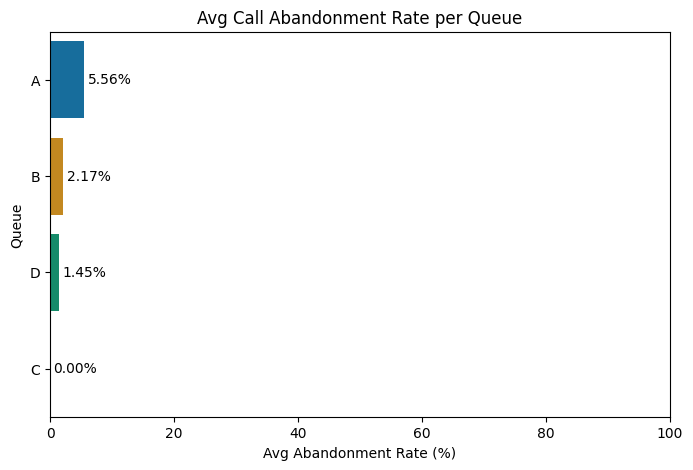

In [ ]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# The dictionary abandonment_rates has the data you need. {Except I deleted the 'Calls' column so bear with me.}
#abandonment_rates = {}
#queues = ["A", "B", "C", "D"]
#queue_dict = df.groupby("Queue").agg("sum")
#for i in range(4):
#    abandonment_rates[queues[i]] = queue_dict["Abandoned"].iloc[i] / queue_dict["Calls"].iloc[i] 

#Your code below:

df_incoming = df[df['Incoming or Outgoing'] == 'Incoming']
calls_per_queue = df_incoming.groupby('Queue').size()
abandoned_per_queue = df_incoming.groupby('Queue')['Abandoned'].sum()
abandonment_rates = (abandoned_per_queue / calls_per_queue * 100).round(2)
abandonment_rates = abandonment_rates.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sb.barplot(x=abandonment_rates.values, y=abandonment_rates.index, palette=('colorblind'))
for i, value in enumerate(abandonment_rates.values):
    ax.text(value + 0.5, i, f"{value:.2f}%", va='center')
plt.xlabel('Avg Abandonment Rate (%)')
plt.ylabel('Queue')
plt.title('Avg Call Abandonment Rate Per Queue')
plt.xlim(0, 100)  
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a bar plot because the way it can be stacked after sorting descending allows an easier visual comparison between the different queues. While having it range from 0-100% leaves a lot of white space because abandonment rates are low, that is valuable information to be able to visualize, as well.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [141]:
# Create visualization 2 here

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_north[(df_north['Incoming or Outgoing'] == 'Incoming') &
                       (df_north["Incoming Wait Time"] <= 2.0)]
#quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_calls.groupby(["Rep ID"]).size().to_frame(name='Quick Calls')  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls = df_north[df_north["Incoming or Outgoing"] == "Incoming"]
#rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = total_calls.groupby(["Rep ID"]).size().to_frame(name='Total Calls') # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Quick Calls"]/service_level["Total Calls"] * 100

#Your Code Here:
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
service_level = service_level.reset_index()
north_stats = pd.merge(
    north_plt, 
    service_level[["Rep ID", "Service Level %"]], 
    on="Rep ID")

north_stats["Incoming Wait Time"] = north_stats["Incoming Wait Time"].round(2)
north_stats["Service Level %"] = north_stats["Service Level %"].round(2)

In [167]:
print(north_stats)

   Rep ID  Incoming Wait Time  Service Level %
0  Amanda                2.40            60.00
1    Andy                3.60            30.00
2   Brent                2.12            75.00
3     Cam                2.91            45.45
4    Duke                2.79            42.86
5     Joe                3.60            20.00
6   Lilly                3.08            33.33
7    Todd                3.50            33.33
8  Xander                3.33            33.33


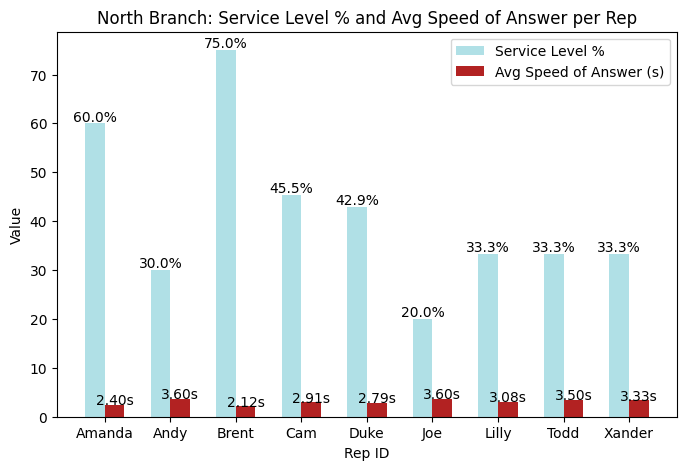

In [149]:
plt.figure(figsize=(8, 5))

# Bar positions
# Positions for bars
x = np.arange(len(north_stats["Rep ID"]))
width = 0.3

# Service Level % bars
plt.bar(x - width/2, north_stats["Service Level %"], width, label="Service Level %", color="powderblue")

# ASA bars
plt.bar(x + width/2, north_stats["Incoming Wait Time"], width, label="Avg Speed of Answer (s)", color="firebrick")

# Add value labels on top of bars
for i in range(len(north_stats)):
    # Service Level %
    plt.text(x[i] - width/2, north_stats["Service Level %"][i] + 0.5, f"{north_stats['Service Level %'][i]:.1f}%", ha='center')
    # ASA
    plt.text(x[i] + width/2, north_stats["Incoming Wait Time"][i] + 0.05, f"{north_stats['Incoming Wait Time'][i]:.2f}s", ha='center')

# Labels, title, legend
plt.xticks(x, north_stats["Rep ID"])
plt.xlabel("Rep ID")
plt.ylabel("Value")
plt.title("North Branch: Service Level % and Avg Speed of Answer per Rep")
plt.legend()
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a column chart for the same similar reason above. The visualization of the bars allows for better comparison between the representatives. Additionally, while this could be split into two separate visualizations, having the ASA included next to a rep's SLA percentage allows that similar comparison between individuals and provides interesting information and poses other questions. Such as, what is Brent doing that allows him to answer his calls so quickly and consistently to reach the 75% SLA?

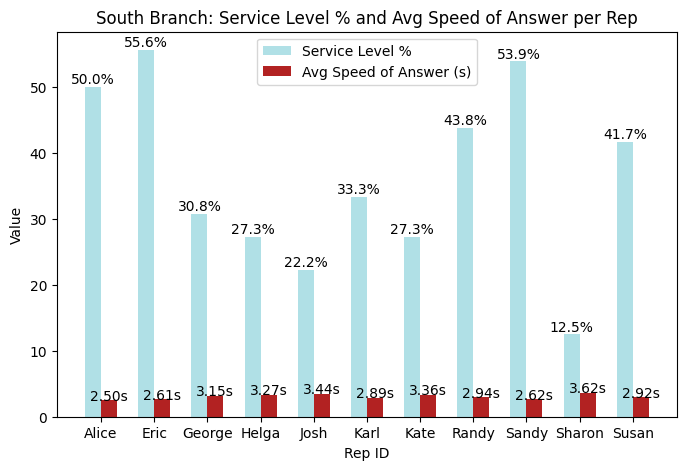

In [164]:
# Additional visualization for South Branch

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls_s = df_south[(df_south['Incoming or Outgoing'] == 'Incoming') &
                       (df_south["Incoming Wait Time"] <= 2.0)]
#quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats_s = quick_calls_s.groupby(["Rep ID"]).size().to_frame(name='Quick Calls')  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_s = df_south[df_south["Incoming or Outgoing"] == "Incoming"]
#rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats_s = total_calls_s.groupby(["Rep ID"]).size().to_frame(name='Total Calls') # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level_s = pd.merge(quick_stats_s, total_stats_s, on="Rep ID")

# Create Percentage Column in Table 3
service_level_s["Service Level %"] = service_level_s["Quick Calls"]/service_level_s["Total Calls"] * 100

#Your Code Here:
# south_plt contains the data you need for the average speed of answer of each rep

south_plt = df_south.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
service_level_s = service_level_s.reset_index()
south_stats = pd.merge(
    south_plt, 
    service_level_s[["Rep ID", "Service Level %"]], 
    on="Rep ID")

south_stats["Incoming Wait Time"] = south_stats["Incoming Wait Time"].round(2)
south_stats["Service Level %"] = south_stats["Service Level %"].round(2)

plt.figure(figsize=(8, 5))

# Bar positions
# Positions for bars
x = np.arange(len(south_stats["Rep ID"]))
width = 0.3

# Service Level % bars
plt.bar(x - width/2, south_stats["Service Level %"], width, label="Service Level %", color="powderblue")

# ASA bars
plt.bar(x + width/2, south_stats["Incoming Wait Time"], width, label="Avg Speed of Answer (s)", color="firebrick")

# Add value labels on top of bars
for i in range(len(south_stats)):
    # Service Level %
    plt.text(x[i] - width/2, south_stats["Service Level %"][i] + 0.5, f"{south_stats['Service Level %'][i]:.1f}%", ha='center')
    # ASA
    plt.text(x[i] + width/2, south_stats["Incoming Wait Time"][i] + 0.05, f"{south_stats['Incoming Wait Time'][i]:.2f}s", ha='center')

# Labels, title, legend
plt.xticks(x, south_stats["Rep ID"])
plt.xlabel("Rep ID")
plt.ylabel("Value")
plt.title("South Branch: Service Level % and Avg Speed of Answer per Rep")
plt.legend()
plt.show()


In [168]:
print(south_stats)

    Rep ID  Incoming Wait Time  Service Level %
0    Alice                2.50            50.00
1     Eric                2.61            55.56
2   George                3.15            30.77
3    Helga                3.27            27.27
4     Josh                3.44            22.22
5     Karl                2.89            33.33
6     Kate                3.36            27.27
7    Randy                2.94            43.75
8    Sandy                2.62            53.85
9   Sharon                3.62            12.50
10   Susan                2.92            41.67


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

In [ ]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


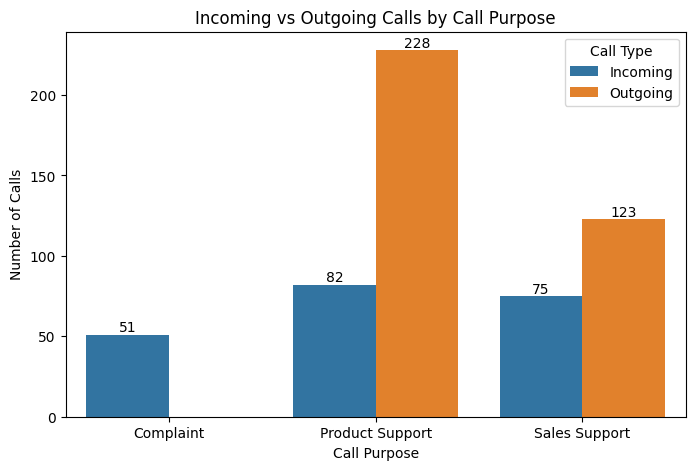

In [163]:
#Your Code Here:

df_plot = purpose_counts.reset_index()
df_plot.columns = ['Call Purpose', 'Call Type', 'Count']

plt.figure(figsize=(8,5))
bar_plot = sb.barplot(data=df_plot, x='Call Purpose', y='Count', hue='Call Type')
for p in bar_plot.patches:
    height = p.get_height() 
    if height > 0:
       bar_plot.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=10)
plt.title('Incoming vs Outgoing Calls by Call Purpose')
plt.ylabel('Number of Calls')
plt.xlabel('Call Purpose')
plt.legend(title='Call Type')
plt.show()


##### Record your answer below:

> Chart style you chose and why: Since we are still comparing call purposes with incoming versus outgoing, a column chart is still a good way to visualize between the different categories.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: Holistically, the South Branch operates more efficiently. While the North Branch has a higher SLA (40.24%) than the South Branch (38.1%), it is supported by one individual performing exceptionally well vis-à-vis his peers. Only 4 of 9 of the North Branch representatives perform above the company-wide 38.94%. Comparatively, 5 out of 11 of the South Branch employees have an SLA above the company-wide average. Further, while there is notable variance between employee performance of the South Branch, there is no one individual seeming to carry the weight of the branch. With only two more employees than the North Branch, the South Branch handles significantly more calls overall (82 versus 126). The South Branch's call abandonment rates are also relatively low. Given all of these factors, the South Branch operates more efficiently.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: It depends on the underlying reason for inefficiencies. It is possible that the North Branch might improve its KPIs with an extra person but there may not be an increased number of calls to manage. An extra person could potentially reduce wait times more, which could reduce calls abandoned. However, the ASA for both branches is relatively close, which does not provide insight into why the abandonment rates vary from 0.79 (South) to 3.66 (North). It may be more of a training issue than a capacity issue.

In fact, given the number of calls that the South Branch does manage to handle with only two more people than the North Branch, an extra person could increase their SLA with the increased capacity.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
I would be interested in caller satisfaction, as simple as, "Was my problem solved or not?" for those incoming product support calls. If issues are being resolved at a higher rate but a slower call response, that may offset business concerns regarding ASA. Qualitative data regarding training consistency, representative attitudes in the workplace, and other such information could also help garner a broader understanding of the environment and causal mechanisms for [lack of] efficiency.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I thought a bubble plot would be interesting to see volume comparisons, but it would almost need to be a proportionality of the aggregate for each call purpose within the total calls for that call block. For ease of visualization for this question, though, I chose another bar chart for comparison purposes. It shows trends of the types of calls throughout the day

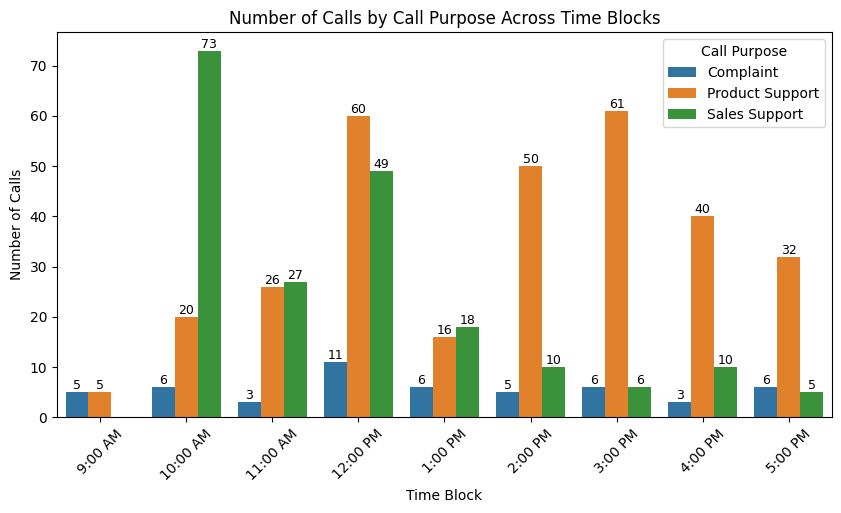

In [183]:
# Create your Bonus Mission visualization here!
#call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# Use groupby to plot based on time blocks:
# Use groupby and get_group to select which call purpose to plot:

chrono_order = ['9:00 AM', '10:00 AM', '11:00 AM', '12:00 PM', '1:00 PM',
              '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM']
time_counts = df.groupby(['Call Purpose', 'Time Block']).size().reset_index(name='Count')

plt.figure(figsize=(10,5))
bar_plot = sb.barplot(data=time_counts, x='Time Block', y='Count', hue='Call Purpose', order=chrono_order)

# Add values on top of bars
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
        bar_plot.annotate(f'{int(height)}',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='bottom', fontsize=9)

plt.title('Number of Calls by Call Purpose Across Time Blocks')
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.legend(title='Call Purpose')
plt.xticks(rotation=45)
plt.show()